# Exploring Dandiset 001359: Human Patch-seq Data

**Note:** This notebook was generated by an AI and has not been fully verified. Please exercise caution when interpreting the code or results and consider consulting the original data and documentation for definitive conclusions.

## What is Patch-seq?

Patch-seq is a multimodal technique that combines electrophysiological recording from a single neuron (patch-clamp), followed by aspiration of the cell's intracellular contents for subsequent genetic sequencing (RNA sequencing), and sometimes anatomical reconstruction. This allows researchers to correlate a neuron's electrical properties, genetic profile, and morphology. This Dandiset contains the electrophysiological data from human neurons.

This notebook explores Dandiset 001359, which contains Patch-seq data from human neurons.

Dandiset 001359: [https://dandiarchive.org/dandiset/001359/0.250401.1603](https://dandiarchive.org/dandiset/001359/0.250401.1603)

The notebook will demonstrate how to:
- Load the Dandiset using the DANDI Python client.
- Access and examine an NWB file within the Dandiset.
- Visualize examples of intracellular electrophysiology recordings (Current Clamp and Voltage Clamp series) from the NWB file.

### Required Packages

This notebook requires the following Python packages:
- dandi
- pynwb
- h5py
- remfile
- numpy
- matplotlib

### Loading the Dandiset

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001359", "0.250401.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603

First 5 assets:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb (ID: 67dc935f-cbc1-4255-bfbf-b8a3b21dacf9)
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb (ID: 6ea1c410-f443-44ef-a471-41fdf7bc8760)
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb (ID: c269347a-2d4b-4b6a-8b7c-2ef303ff503d)
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb (ID: f9663375-c4d6-4a9a-941f-c93c8a7b333a)
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb (ID: e11626f5-2176-48fc-9c4e-26da02787ba3)


### Exploring an NWB File

Dandiset 001359 contains several NWB files, each representing intracellular electrophysiology recordings from a human neuron. We will now load and explore one of these files: `sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb`.

In [2]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

# Load the NWB file
# The URL for the selected asset is: https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/
url = "https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some metadata from the NWB file
print(f"Session ID: {nwb.session_id}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session ID: 1207262032
Subject ID: 1203384279
Species: Homo sapiens
Sex: M
Age: P21170.0D


#### NWB File Contents Overview

This NWB file contains intracellular electrophysiology data, including both voltage and current clamp recordings. Let's inspect the main containers:

In [3]:
# List the keys in the acquisition and stimulus sections
print("Acquisition keys:", list(nwb.acquisition.keys()))
print("Stimulus keys:", list(nwb.stimulus.keys()))

Acquisition keys: ['data_00000_AD0', 'data_00001_AD0', 'data_00002_AD0', 'data_00003_AD0', 'data_00004_AD0', 'data_00005_AD0', 'data_00006_AD0', 'data_00007_AD0', 'data_00008_AD0', 'data_00009_AD0', 'data_00010_AD0', 'data_00011_AD0', 'data_00012_AD0', 'data_00013_AD0', 'data_00014_AD0', 'data_00015_AD0', 'data_00016_AD0', 'data_00017_AD0', 'data_00018_AD0', 'data_00019_AD0', 'data_00020_AD0', 'data_00021_AD0', 'data_00022_AD0', 'data_00023_AD0', 'data_00024_AD0', 'data_00025_AD0', 'data_00026_AD0', 'data_00027_AD0', 'data_00028_AD0', 'data_00029_AD0', 'data_00030_AD0', 'data_00031_AD0', 'data_00032_AD0', 'data_00033_AD0', 'data_00034_AD0', 'data_00035_AD0', 'data_00036_AD0', 'data_00037_AD0', 'data_00038_AD0', 'data_00039_AD0', 'data_00040_AD0', 'data_00041_AD0', 'data_00042_AD0', 'data_00043_AD0', 'data_00044_AD0', 'data_00045_AD0', 'data_00046_AD0', 'data_00047_AD0', 'data_00048_AD0', 'data_00049_AD0', 'data_00050_AD0', 'data_00051_AD0', 'data_00052_AD0', 'data_00053_AD0', 'data_000

As seen above, the `/acquisition` section contains the recorded electrophysiology data series, and the `/stimulus` section contains the applied stimulus waveforms. The keys follow a pattern `data_[sweep_number]_[electrode_id]`.

The file also contains:

*   `/icephys_electrodes`: Information about the intracellular electrode(s).
*   `/intervals/epochs`: Time intervals corresponding to different experimental epochs or sweeps.
*   `/sweep_table`: Table organizing the data by sweep number.

The sweep table provides a mapping of sweeps to the corresponding data and stimulus series. Let's display the first few rows of the sweep table:

In [4]:
# Display the first few rows of the sweep table
print(nwb.sweep_table.to_dataframe().head())

                                               series  sweep_number
id                                                                 
0   [data_00000_AD0 pynwb.icephys.VoltageClampSeri...             0
1   [data_00000_DA0 pynwb.icephys.VoltageClampStim...             0
2   [data_00001_AD0 pynwb.icephys.VoltageClampSeri...             1
3   [data_00001_DA0 pynwb.icephys.VoltageClampStim...             1
4   [data_00002_AD0 pynwb.icephys.VoltageClampSeri...             2


#### Explore this NWB file on Neurosift

You can explore this NWB file directly in your browser using Neurosift:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=draft)

### Visualizing Electrophysiology Data

We will now visualize data from some of the acquisition series to illustrate the typical recordings in this Dandiset.

#### Current Clamp Recording Example

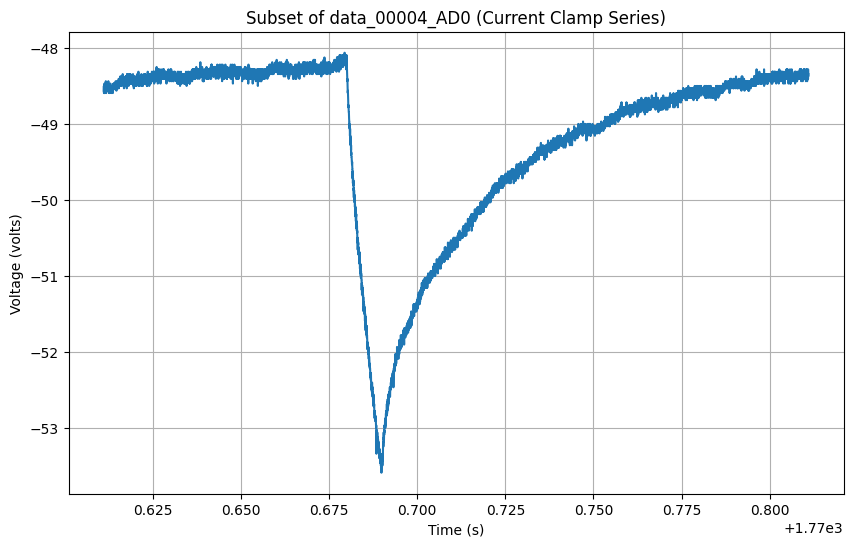

In [5]:
# Access CurrentClampSeries data
# We will use data_00004_AD0
data_series_cc = nwb.acquisition["data_00004_AD0"]

# Get a subset of the data and times for plotting
num_points_to_plot = 10000
data_subset_cc = data_series_cc.data[0:num_points_to_plot]
starting_time_cc = data_series_cc.starting_time
rate_cc = data_series_cc.rate
time_cc = starting_time_cc + np.arange(num_points_to_plot) / rate_cc

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time_cc, data_subset_cc)
plt.xlabel("Time (s)")
plt.ylabel(f"Voltage ({data_series_cc.unit})")
plt.title(f"Subset of {data_series_cc.name} (Current Clamp Series)")
plt.grid(True)
plt.show()

This plot shows a segment of a Current Clamp recording, where the membrane voltage of the neuron is recorded while a current is injected. We can observe a rapid voltage deflection likely corresponding to a stimulus artifact or a neuronal response.

#### Voltage Clamp Recording Example

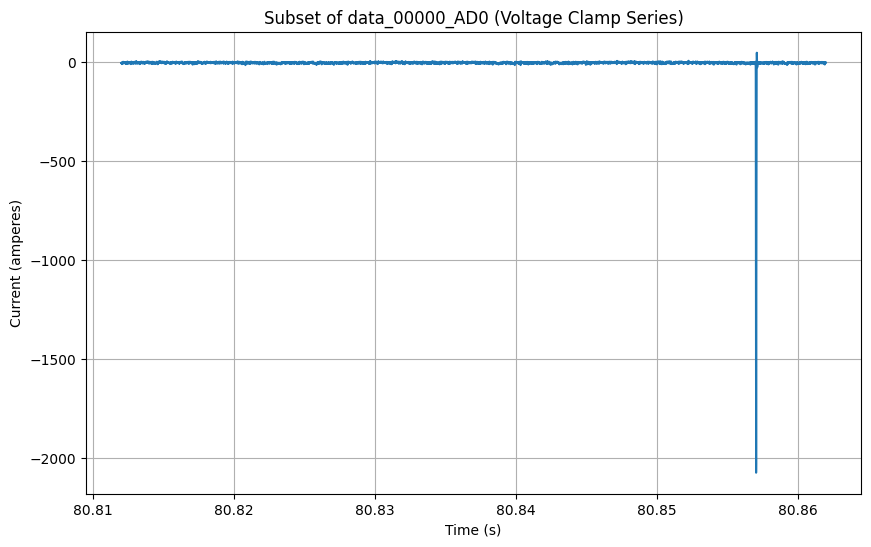

In [6]:
# Access VoltageClampSeries data
# We will use data_00000_AD0
data_series_vc = nwb.acquisition["data_00000_AD0"]

# Get a subset of the data and times for plotting
num_points_to_plot = 10000
data_subset_vc = data_series_vc.data[0:num_points_to_plot]
starting_time_vc = data_series_vc.starting_time
rate_vc = data_series_vc.rate
time_vc = starting_time_vc + np.arange(num_points_to_plot) / rate_vc

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time_vc, data_subset_vc)
plt.xlabel("Time (s)")
plt.ylabel(f"Current ({data_series_vc.unit})")
plt.title(f"Subset of {data_series_vc.name} (Voltage Clamp Series)")
plt.grid(True)
plt.show()

This plot shows a segment of a Voltage Clamp recording, where the membrane voltage is held constant and the resulting current is measured. We can observe a sharp, large negative current transient shortly after the recording starts, likely representing a fast inward current.

#### Stimulus and Response Example

To understand the experimental protocol, it is often useful to visualize the applied stimulus alongside the recorded response. Let's plot the stimulus and response for the Current Clamp series `data_00004_AD0`.

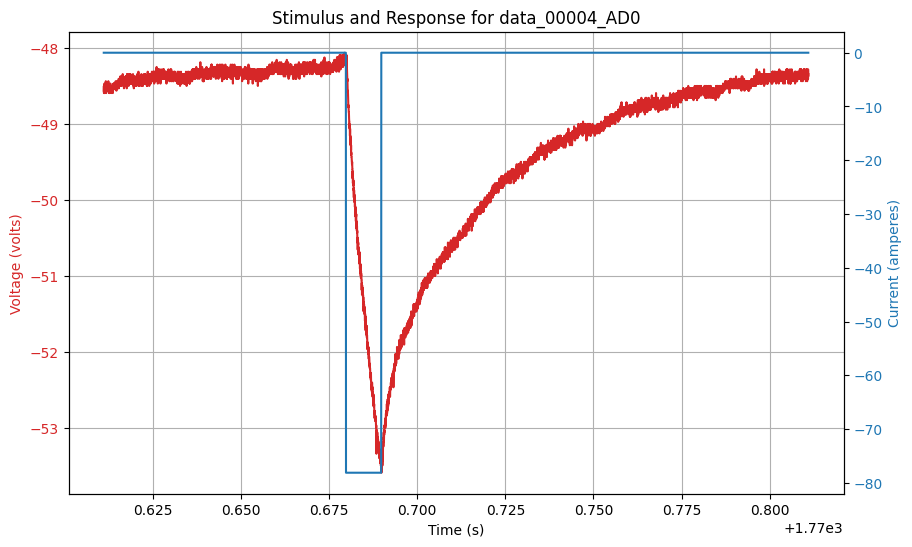

In [7]:
# Access CurrentClampStimulusSeries data
stimulus_series_cc = nwb.stimulus["data_00004_DA0"]

# Get a subset of the stimulus data and times for plotting
num_points_to_plot_stim = 10000
stimulus_subset_cc = stimulus_series_cc.data[0:num_points_to_plot_stim]
starting_time_stim_cc = stimulus_series_cc.starting_time
rate_stim_cc = stimulus_series_cc.rate
time_stim_cc = starting_time_stim_cc + np.arange(num_points_to_plot_stim) / rate_stim_cc

# Assume the starting times and rates are the same or aligned for this example
# In a real analysis, you might need to align them precisely

# Plot stimulus and response
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel(f"Voltage ({data_series_cc.unit})", color=color)
ax1.plot(time_cc, data_subset_cc, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(f"Current ({stimulus_series_cc.unit})", color=color)
ax2.plot(time_stim_cc, stimulus_subset_cc, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f"Stimulus and Response for {data_series_cc.name}")
plt.show()

### Summary and Future Directions

This notebook provided a basic introduction to accessing and visualizing intracellular electrophysiology data from Dandiset 001359. We demonstrated how to load the Dandiset and an NWB file, examine its structure, and plot examples of Current Clamp and Voltage Clamp recordings, as well as an example of stimulus and response together.

Possible future directions for analysis include:
- Analyzing the `epochs` and `sweep_table` to organize and process data by experimental sweep.
- Implementing more advanced analysis techniques for intracellular electrophysiology data, such as calculating input resistance, membrane time constant, or analyzing action potential properties (though full spike sorting is beyond the scope of a simple notebook).
- Examining other NWB files in the Dandiset to compare recordings from different neurons or experimental conditions.
- Further exploring the stimulus waveforms and their exact timing relative to the recorded responses.

In [8]:
# Close the NWB file
io.close()